<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the neural network classification with  the  Tendorflowo
In this notebook we're going to learn how to erite a neural network for the classification problems

A classification is where you try to classify something as one of the thing or anotherthing

A few types if the Classification

*Binary Classificatioin

*Multiclass Classification

*Multilabel Classificatioin


#Creating Data to view & fit

In [1]:
from sklearn.datasets import make_circles
#make the 100 examples
n_samples=1000
#create circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [2]:
#Check out the features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


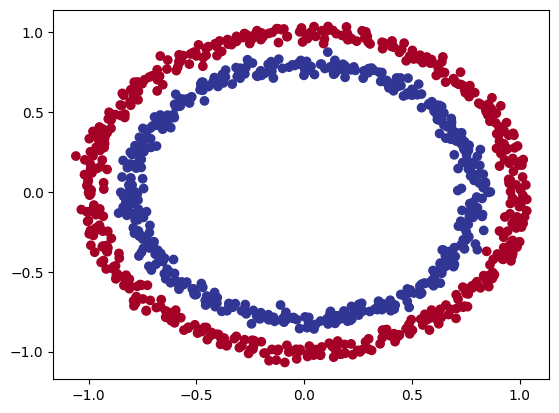

In [5]:
#visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output Shape

In [6]:
#Checking the shpaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
#no. of samples
len(x), len(y)

(1000, 1000)

In [8]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modeling

The steps in modeling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate

In [9]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [10]:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4962 - loss: 5.7756
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4896 - loss: 5.0985
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4807 - loss: 4.5117
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5065 - loss: 3.0663
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5173 - loss: 0.7186


In [11]:
##Improving the model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it guessing.

So, let's step things up a notch and add an extra layer




In [12]:


tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y,epochs=100, verbose=0)

model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 0.6933


[0.6932145953178406, 0.5]

In [13]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 0.6933


[0.6932145953178406, 0.5]

##Improving our model


Adding the more  layers & increaes the layers of the hidden units

Using the different optimization function such as Adam

We also can fit more epochs for our model


In [14]:

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x,y,epochs=100, verbose=0)


In [15]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.6915


[0.6950819492340088, 0.49000000953674316]

#Let's us create another model

In [16]:
tf.random.set_seed(42)
x_regression=tf.range(0,1000, 5)
y_regression=tf.range(100,1100,5)

x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]


y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


# x_regression, y_regression
x_reg_train.shape, x_reg_test.shape


(TensorShape([150]), TensorShape([50]))

In [17]:

tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 535.5952 - mae: 535.5952
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 447.1099 - mae: 447.1099 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 357.3869 - mae: 357.3869 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 264.5788 - mae: 264.5788 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 167.1331 - mae: 167.1331 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.0090 - mae: 68.0090 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 63.2871 - mae: 63.2871 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 80.4909 - mae: 80.4909 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60.1817 - mae: 60.1817 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.8480 - mae: 41.8480 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.6825 - mae: 45.6825
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39.9645 - mae: 39.9645 
Epoch 13/100
5/5

In [18]:
model_4.evaluate(x_reg_test,y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 55.8291 - mae: 55.8291 


[58.41878890991211, 58.41878890991211]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


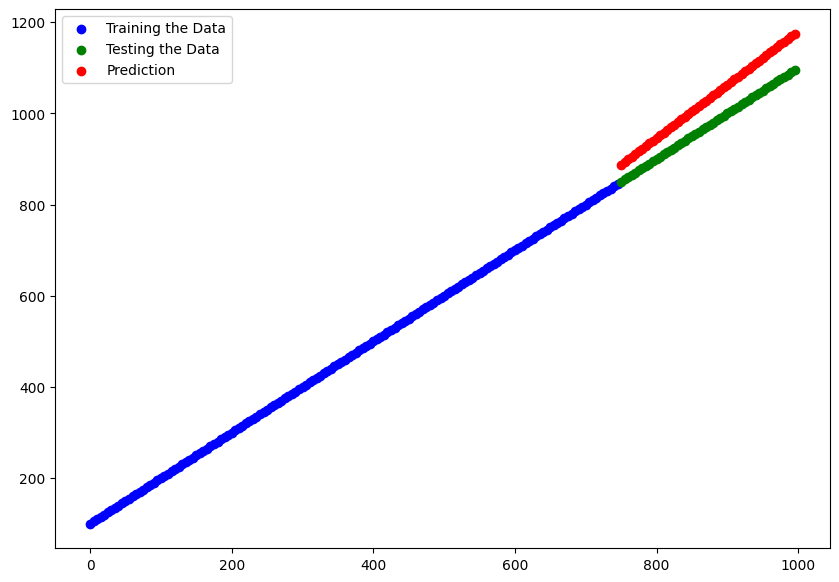

In [19]:
#making the predictioin with our trained model
y_reg_pred=model_4.predict(x_reg_test)
y_reg_pred

#plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training the Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing the Data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend()

#The Missing Piece: Non-linearity part

In [20]:

tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(x, y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4786 - loss: 6.7879
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4815 - loss: 6.7849
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 6.7695
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - loss: 6.7552
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7358
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7389
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7388
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7388
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7387
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7343
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 6.7368
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

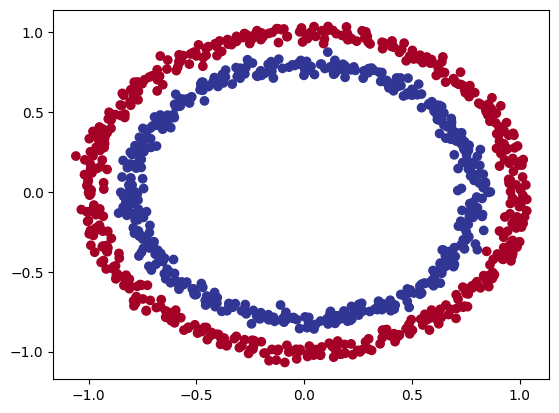

In [21]:
#checking our data
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [33]:
# #checking the decision boundary
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y)

TypeError: plot_decision_boundary() got an unexpected keyword argument 'x'

#Building the first neural network with the non-linear activation function

In [23]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x,y,epochs=100, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 4.6852
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.6063
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.5397
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.4165
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.2090
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9306
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9261
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9251
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9243
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9235
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 3.9181
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [24]:
model_6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 2.7443


[2.585927963256836, 0.5]

In [25]:
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_7.fit(x, y, epochs=250, verbose=1)

# x.shape, y.shape

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5217 - loss: 0.6948
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5146 - loss: 0.6937
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4921 - loss: 0.6935
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4947 - loss: 0.6934
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4959 - loss: 0.6932
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.6930
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4853 - loss: 0.6926
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4903 - loss: 0.6922
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 0.6918
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4962 - loss: 0.6912
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4931 - loss: 0.6907
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [26]:
model_7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.0845


[0.08187448978424072, 0.9919999837875366]

In [29]:
#how do our model's prediction loooks like
# plot_decision_boundary(model_7, x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


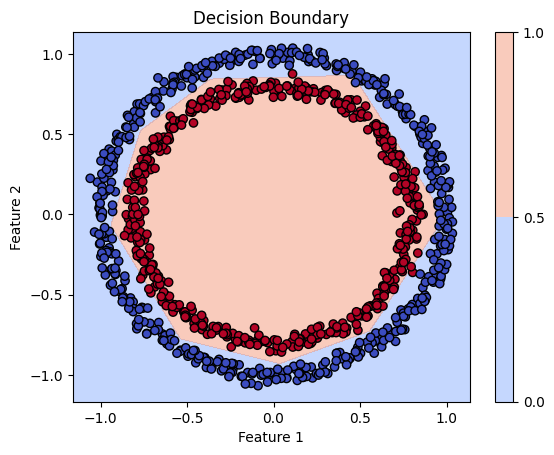

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a trained model.

    Parameters:
    - model: Trained TensorFlow model
    - X: Input features (2D)
    - y: Target labels (binary classification)
    """
    # Define min and max values for the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a grid of points with a small step size
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Stack and reshape into (N, 2) for model predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each grid point
    preds = model.predict(grid_points)
    preds = preds.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.5, cmap="coolwarm")
    plt.colorbar()

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="coolwarm", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Call the function
plot_decision_boundary(model_7, x, y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


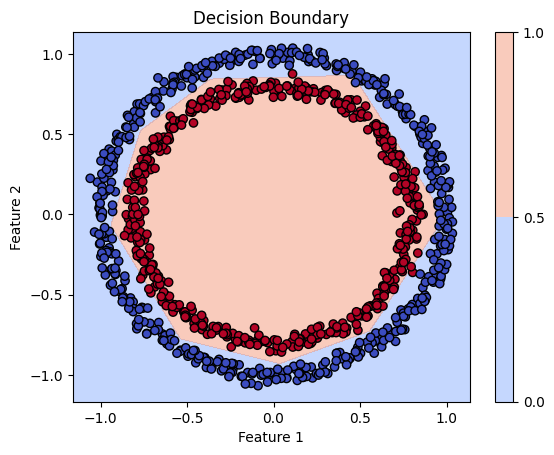

In [32]:
plot_decision_boundary(model_7, x, y)

In [34]:
#Create a toy tensor(similar to the data we pass into our model)
A=tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

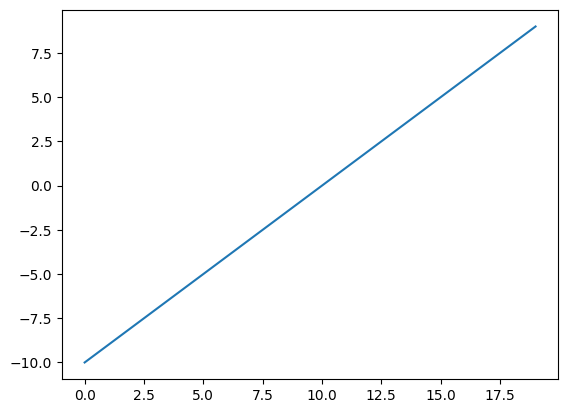

In [35]:
#vislauising our toy tensor
plt.plot(A)

In [36]:
#Let's start by replicating sigmoid -sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [37]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

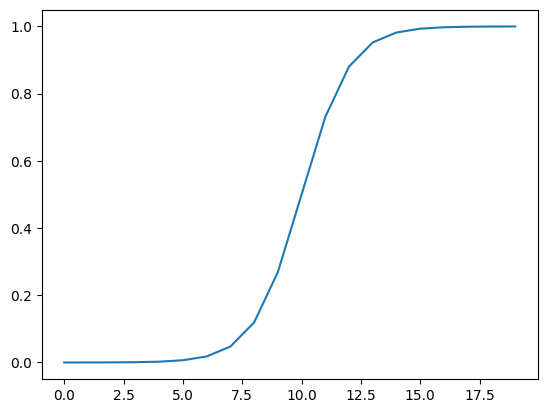

In [42]:
plt.plot(sigmoid(A))

In [43]:
#let's create the relu function
def relu(x):
  return tf.maximum(0,x)

In [47]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [45]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

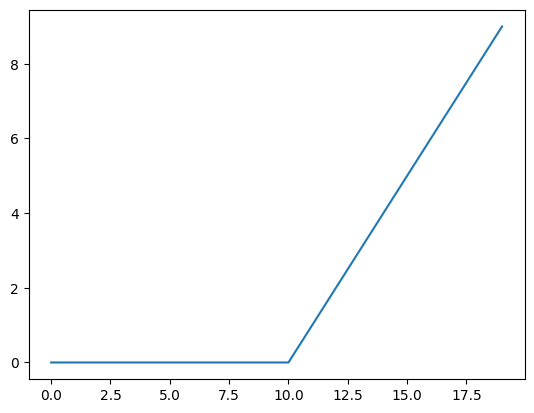

In [46]:
plt.plot(relu(A))

In [49]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
#let's try the linear activation functioin
def linear(x):


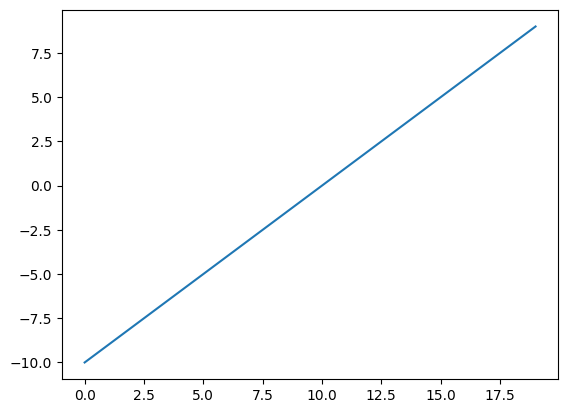

In [50]:
plt.plot(tf.keras.activations.linear(A))

In [52]:
#does A== tf.keras.activation.linear(A)
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and Improving our Classification

In [56]:
x.shape,y.shape

((1000, 2), (1000,))

In [61]:
x_train, y_train=x[:800], y[:800]
x_test, y_test=x[800:], y[800:]

x_train.shape, x_test.shape,y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Creating the model to fit and to evaluate on the training and testing the data
